In [1]:
from __future__ import division

import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta, date, time

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [2]:
training_path = 'dataSets/training/'
test_path1 = 'dataSets/testing_phase1/'

In [3]:
training_traj = pd.read_csv(training_path+'trajectories(table 5)_training.csv')
test_traj1 = pd.read_csv(test_path1+'trajectories(table 5)_test1.csv')

In [4]:
training_vol = pd.read_csv(training_path+'volume(table 6)_training.csv')
test_vol1 = pd.read_csv(test_path1+'volume(table 6)_test1.csv')

In [5]:
def time_to_window(x):
    dt = datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
    dtmin = int(dt.minute / 10) * 10
    dtwindow = datetime(dt.year, dt.month, dt.day, dt.hour, dtmin, 0)
    return dtwindow


In [6]:
def format_window(wd):
    return '[{},{})'.format(str(wd), str(wd+timedelta(minutes=10)))

In [7]:
#training_traj['starting_datetime'] = pd.to_datetime(training_path['starting_time'])
training_traj['window'] = training_traj['starting_time'].apply(time_to_window)

training_traj_group_mean = \
training_traj.groupby(['intersection_id','tollgate_id','window']).mean()['travel_time']

training_traj_group_count = \
training_traj.groupby(['intersection_id','tollgate_id','window']).count()['travel_time']

In [8]:
training_vol['window'] = training_vol['time'].apply(time_to_window)

training_vol_group_count = \
training_vol.groupby(['tollgate_id','direction','window']).count()['time']



In [9]:
test_vol1['window'] = test_vol1['time'].apply(time_to_window)

test_vol_group_count = \
test_vol1.groupby(['tollgate_id','direction','window']).count()['time']

In [10]:
sample = pd.read_csv('/Users/yutao/Documents/Contest/tianchi/KDD_CUP2017/submission/submission_sample_volume.csv')

In [11]:
date_list = []

d1 = date(2016, 9, 19)  # start date
d2 = date(2016, 10, 17)  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    date_list.append(d1 + timedelta(days=i))

give_time_list1 = [time(6,0), time(6,10), time(6,20),
                   time(6,30), time(6,40), time(6,50),
                   time(7,0), time(7,10), time(7,20),
                   time(7,30), time(7,40), time(7,50)]
pred_time_list1 = [time(8,0), time(8,10), time(8,20),
                   time(8,30), time(8,40), time(8,50),
                   time(9,0), time(9,10), time(9,20),
                   time(9,30), time(9,40), time(9,50)]

give_time_list2 = [time(15,0), time(15,10), time(15,20),
                   time(15,30), time(15,40), time(15,50),
                   time(16,0), time(16,10), time(16,20),
                   time(16,30), time(16,40), time(16,50)]
pred_time_list2 = [time(17,0), time(17,10), time(17,20),
                   time(17,30), time(17,40), time(17,50),
                   time(18,0), time(18,10), time(18,20),
                   time(18,30), time(18,40), time(18,50)]

In [12]:
date_list2 = []

d1 = date(2016, 10, 11)  # start date
d2 = date(2016, 10, 17)  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    date_list2.append(d1 + timedelta(days=i))


In [13]:
def interpolate_missing_window(x):
    ss = [(i-datetime(1970,1,1)).total_seconds() for i in x.index]
    tt = x.values
    ssall = np.linspace(ss[0], ss[-1], (ss[-1]-ss[0])/600+1)
    #print(len(ss), len(tt), len(ssall))
    ttall = np.interp(ssall, ss, tt)
    ssall = [int(i) for i in ssall]
    ssall = [datetime(1970,1,1)+timedelta(seconds=i) for i in ssall]
    return pd.Series(index=ssall, data=ttall)

In [14]:
first6 = np.array([])
next6 = np.array([])
for ti, d in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    mtmp = training_vol_group_count.loc[ti, d]
    #mtmp = interpolate_missing_window(mtmp)
    test6 = []
    for i in date_list:
        tmp = []
        for j in give_time_list1:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    first6 = np.append(first6, result6)
    
    test6 = []
    for i in date_list:
        tmp = []
        for j in pred_time_list1:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    next6 = np.append(next6, result6)

morning_volume66 = np.append(first6.reshape(-1,12), next6.reshape(-1,12), axis=1)

In [1]:
tiid = ['10']*29 + ['11']*29 + ['20']*29 + ['30']*29 + ['31']*29
dlid = date_list*5

NameError: name 'date_list' is not defined

In [16]:
first6 = np.array([])
next6 = np.array([])
for ti, d in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    mtmp = training_vol_group_count.loc[ti, d]
    #mtmp = interpolate_missing_window(mtmp)
    test6 = []
    for i in date_list:
        tmp = []
        for j in give_time_list2:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    first6 = np.append(first6, result6)
    
    test6 = []
    for i in date_list:
        tmp = []
        for j in pred_time_list2:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    next6 = np.append(next6, result6)

night_volume66 = np.append(first6.reshape(-1,12), next6.reshape(-1,12), axis=1)

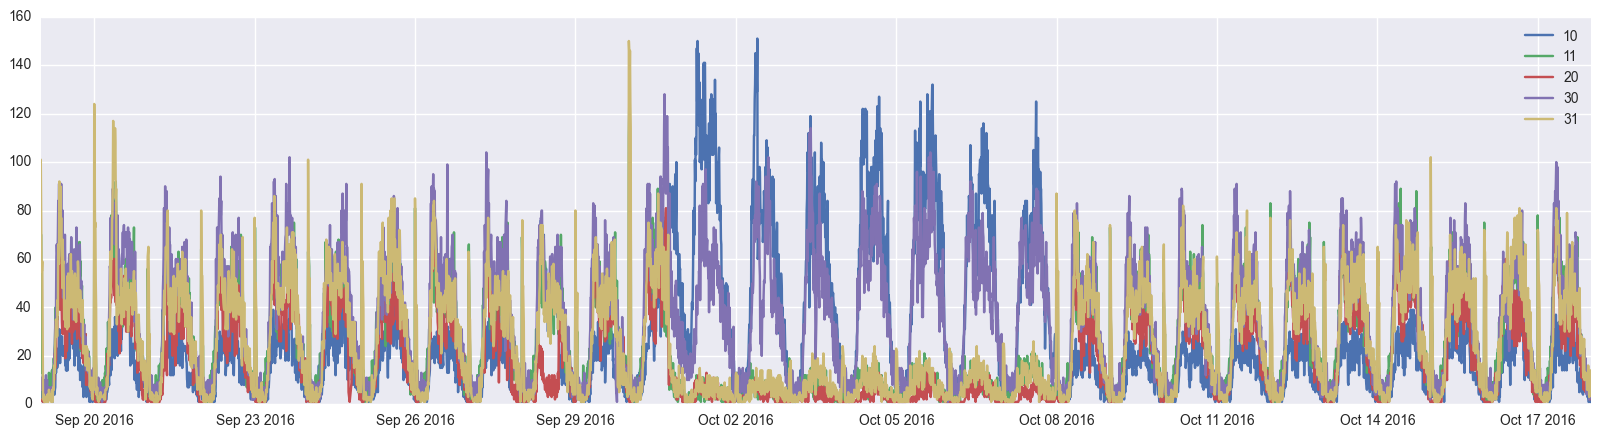

In [17]:
ttt10 = training_vol_group_count.loc[1, 0]
ttt11 = training_vol_group_count.loc[1, 1]
ttt20 = training_vol_group_count.loc[2, 0]
ttt30 = training_vol_group_count.loc[3, 0]
ttt31 = training_vol_group_count.loc[3, 1]

plt.figure(figsize=(20,5))
plt.plot(ttt10.index, ttt10)
plt.plot(ttt11.index, ttt11)
plt.plot(ttt20.index, ttt20)
plt.plot(ttt30.index, ttt30)
plt.plot(ttt31.index, ttt31)

plt.legend([10,11,20,30,31])

In [18]:
df_morning = pd.DataFrame(morning_volume66)

df_night = pd.DataFrame(night_volume66)

In [19]:
len(df_morning)

145

In [20]:
df_morning['ti'] = tiid
df_morning['dl'] = dlid
df_night['ti'] = tiid
df_night['dl'] = dlid

In [21]:
holiday_list = []

d1 = date(2016, 10, 1)  # start date
d2 = date(2016, 10, 7)  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    holiday_list.append(d1 + timedelta(days=i))

In [22]:
df_morning2 = df_morning[~df_morning['dl'].isin(holiday_list)]
df_night2 = df_night[~df_night['dl'].isin(holiday_list)]

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
def pred_loss(x_pred, x_true):
    x_pred = np.array(x_pred).reshape(-1,2).sum(axis=1)
    x_true = np.array(x_true).reshape(-1,2).sum(axis=1)
    #print(x_true)

    return (abs(x_pred-x_true)/x_true).mean()

In [25]:
df_morning2['wkwn'] = ([1,1,1,1,1,0,0,1,1,1,1,1,1,1,1]+[1,1,1,1,0,0,1])*5
df_morning2['wkwn'] *= 35

/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [163]:
date_train = df_morning2['dl'].unique()[:-7]
df_morning2_train = df_morning2[df_morning2['dl'].isin(date_train)]
df_morning2_valid = df_morning2[~df_morning2['dl'].isin(date_train)]

In [164]:
df_morning2_valid = df_morning2_valid[df_morning2_valid.index!=84]

In [165]:
X = df_morning2_train.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,-1]]#.values
y = df_morning2_train.iloc[:,12:24]#.values


neigh = KNeighborsRegressor(n_neighbors=8, weights='distance')
neigh.fit(X, y)
# for _ in range(3):
#     y = 0.1*y + 0.9*neigh.predict(X)
#     neigh.fit(X, y)
    

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='distance')

In [166]:
pred_loss((neigh.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,-1]])-2.5), 
          df_morning2_valid.iloc[:,12:24])

0.11725306535304252

In [29]:
AA = X.iloc[:,-1].values

In [30]:
AAV = df_morning2_valid.iloc[:,-1].values

In [107]:
mm = 11/6

In [108]:
XV = X.iloc[:,:-1].values

In [109]:
X2 = XV[:,:-1] + XV[:,1:]

In [110]:
X2 = np.append(X2, mm*AA.reshape(-1,1), axis=1)

In [111]:
XVV = df_morning2_valid.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].values

In [112]:
X2V = XVV[:,:-1] + XVV[:,1:]

In [113]:
X2V = np.append(X2V, mm*AAV.reshape(-1,1), axis=1)

In [118]:
neigh = KNeighborsRegressor(n_neighbors=7, weights='distance')
neigh.fit(X2, y)
# for _ in range(3):
#     y = 0.1*y + 0.9*neigh.predict(X)
#     neigh.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='distance')

In [105]:
neigh = KNeighborsRegressor(n_neighbors=8)
neigh.fit(X2, y)
for _ in range(3):
    y = 0.1*y + 0.9*neigh.predict(X2)
    neigh.fit(X2, y)

In [80]:
neigh = KNeighborsRegressor(n_neighbors=8, weights='distance')
neigh.fit(X, y)
# for _ in range(3):
#     y = 0.1*y + 0.9*neigh.predict(X)
#     neigh.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='distance')

In [43]:
m1bf = \
pd.concat([df_morning2_train.iloc[:,1:24], 
           df_morning2_train.iloc[:,23],
           df_morning2_train.iloc[:,-3:]], axis=1)
m1bf.columns = df_morning2_train.columns

In [44]:
m1af = \
pd.concat([df_morning2_train.iloc[:,0], 
           df_morning2_train.iloc[:,0:23],
           df_morning2_train.iloc[:,-3:]], axis=1)
m1af.columns = df_morning2_train.columns

In [45]:
dbf = pd.concat([df_morning2_train, m1bf, m1af])

In [46]:
X = dbf.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,-1]]#.values
y = dbf.iloc[:,12:24]#.values


neigh = KNeighborsRegressor(n_neighbors=40, weights='distance')
neigh.fit(X, y)
# for _ in range(3):
#     y = 0.1*y + 0.9*neigh.predict(X)
#     neigh.fit(X, y)
    

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=40, p=2,
          weights='distance')

In [47]:
pred_loss((neigh.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,-1]])*0.97), 
          df_morning2_valid.iloc[:,12:24])

0.12146344639680715

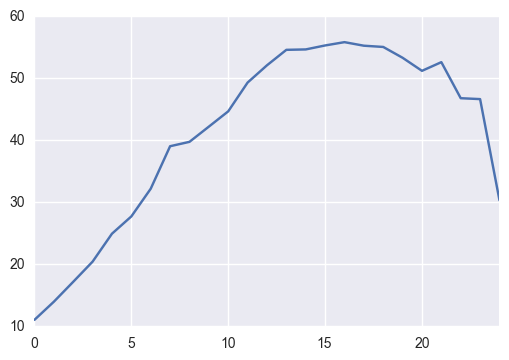

In [48]:
df_morning2_train.mean().plot()

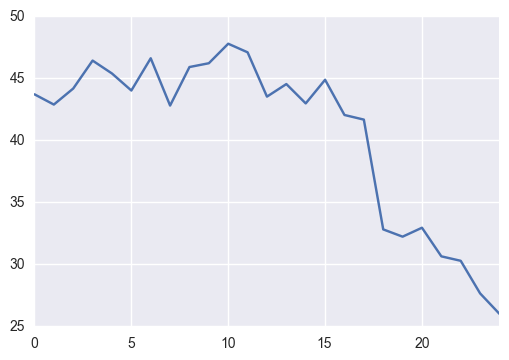

In [126]:
df_night2_train.mean().plot()

In [127]:
df_night2_valid.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,wkwn
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,44.571429,45.200000,46.771429,45.771429,43.285714,45.685714,46.428571,46.428571,46.171429,47.457143,...,45.742857,44.371429,42.000000,33.057143,34.028571,33.200000,32.885714,27.742857,28.371429,21.428571
std,14.731490,16.746905,14.741071,13.499642,12.306315,16.060129,14.467582,15.811920,11.660607,15.465983,...,18.383725,17.477861,18.389575,13.473160,14.217813,12.026441,12.118948,10.600618,10.976139,13.750477
min,24.000000,12.000000,21.000000,20.000000,18.000000,12.000000,21.000000,18.000000,21.000000,21.000000,...,10.000000,13.000000,9.000000,9.000000,10.000000,12.000000,12.000000,5.000000,9.000000,0.000000
25%,30.500000,34.500000,37.500000,35.500000,36.000000,38.500000,35.500000,36.000000,39.500000,38.000000,...,33.000000,36.500000,27.000000,24.000000,22.500000,28.500000,22.000000,20.500000,22.500000,0.000000
50%,43.000000,49.000000,47.000000,47.000000,44.000000,46.000000,48.000000,43.000000,47.000000,47.000000,...,44.000000,46.000000,44.000000,35.000000,35.000000,35.000000,34.000000,27.000000,28.000000,30.000000
75%,56.500000,57.000000,57.000000,54.000000,50.000000,56.000000,56.000000,59.500000,54.000000,61.500000,...,60.500000,58.000000,56.000000,43.500000,43.500000,42.000000,42.000000,36.000000,34.000000,30.000000
max,78.000000,73.000000,76.000000,83.000000,70.000000,81.000000,73.000000,75.000000,66.000000,79.000000,...,88.000000,67.000000,69.000000,59.000000,71.000000,51.000000,66.000000,45.000000,54.000000,30.000000


In [56]:
import copy

In [167]:
neigh_morning = copy.deepcopy(neigh)

In [58]:
npred = neigh.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-1]])
ntrue = df_morning2_valid.iloc[:,6:12].values


In [59]:
# npred = neigh.predict(df_morning2_train.iloc[:,[0,1,2,3,4,5,-1]])
# ntrue = df_morning2_train.iloc[:,6:12].values

(array([  1.,   1.,   2.,   1.,  13.,   8.,  14.,  20.,  28.,  23.,  22.,
         26.,  17.,  14.,   7.,   4.,   0.,   3.]),
 array([-0.77642379, -0.69524473, -0.61406567, -0.53288661, -0.45170755,
        -0.37052849, -0.28934943, -0.20817037, -0.12699131, -0.04581225,
         0.03536681,  0.11654587,  0.19772493,  0.27890399,  0.36008305,
         0.44126211,  0.52244117,  0.60362023,  0.68479929]),
 <a list of 18 Patch objects>)

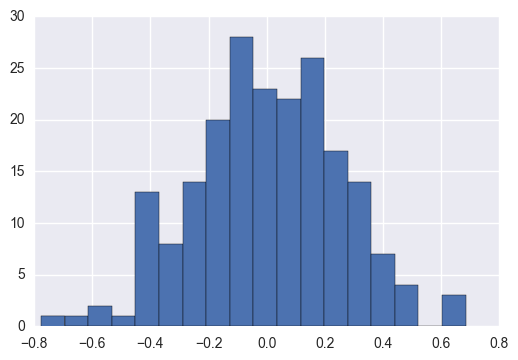

In [60]:
loss_ratio = ((ntrue-npred)/npred).flatten()
plt.hist(loss_ratio, bins=18)

In [61]:
(loss_ratio>0.4).reshape(-1,6).sum(axis=1)

array([0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [62]:
df_morning2_valid[(loss_ratio>0.4).reshape(-1,6).sum(axis=1)>0]

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,ti,dl,wkwn
27,4.0,2.0,2.0,5.0,1.0,9.0,3.0,16.0,7.0,21.0,...,18.0,31.0,20.0,23.0,24.0,25.0,23.0,10,2016-10-16,0
28,6.0,7.0,8.0,10.0,12.0,7.0,23.0,22.0,20.0,24.0,...,29.0,23.0,20.0,20.0,34.0,16.0,25.0,10,2016-10-17,35
80,15.0,10.0,15.0,16.0,28.0,24.0,40.0,54.0,50.0,59.0,...,71.0,49.0,57.0,42.0,50.0,37.0,34.0,20,2016-10-11,35
81,13.0,19.0,14.0,13.0,13.0,32.0,40.0,51.0,43.0,49.0,...,53.0,50.0,62.0,49.0,59.0,45.0,41.0,20,2016-10-12,35
83,7.0,13.0,21.0,24.0,21.0,26.0,34.0,53.0,49.0,47.0,...,62.0,58.0,47.0,63.0,54.0,44.0,33.0,20,2016-10-14,35
86,13.0,18.0,23.0,22.0,26.0,26.0,33.0,51.0,52.0,73.0,...,54.0,59.0,55.0,56.0,46.0,45.0,46.0,20,2016-10-17,35
111,15.0,16.0,17.0,21.0,36.0,36.0,55.0,55.0,72.0,62.0,...,74.0,70.0,78.0,72.0,68.0,65.0,66.0,30,2016-10-13,35
113,7.0,12.0,23.0,19.0,37.0,43.0,53.0,50.0,59.0,48.0,...,77.0,60.0,67.0,65.0,50.0,57.0,64.0,30,2016-10-15,0
144,19.0,13.0,18.0,23.0,25.0,24.0,40.0,47.0,58.0,53.0,...,76.0,69.0,67.0,67.0,70.0,53.0,53.0,31,2016-10-17,35


In [63]:
from scipy.stats import norm

In [64]:
norm.fit(loss_ratio, floc=0)

(0, 0.25355777178117955)

In [147]:
df_night2['wkwn'] = ([1,1,1,1,1,0,0,1,1,1,1,1,1,1,1]+[1,1,1,1,0,0,1])*5
df_night2['wkwn'] *= 30

/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [148]:
date_train = df_night2['dl'].unique()[:-7]
df_night2_train = df_night2[df_night2['dl'].isin(date_train)]
df_night2_valid = df_night2[~df_night2['dl'].isin(date_train)]

In [181]:
X = df_night2_train.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,-1]]#.values
y = df_night2_train.iloc[:,12:24]#.values

neigh = KNeighborsRegressor(n_neighbors=13, weights='distance')
neigh.fit(X, y) 
pred_loss(np.vectorize(round)(neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,-1]])-2), 
          df_night2_valid.iloc[:,12:24])

0.15802230424674507

In [155]:
neigh_night = copy.deepcopy(neigh)

In [157]:
npred = neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,-1]])
ntrue = df_night2_valid.iloc[:,12:24].values

(array([  3.,   9.,  14.,  30.,  46.,  78.,  46.,  61.,  62.,  33.,  22.,
          7.,   6.,   1.,   0.,   1.,   0.,   1.]),
 array([-0.63204649, -0.53603306, -0.44001964, -0.34400621, -0.24799278,
        -0.15197936, -0.05596593,  0.04004749,  0.13606092,  0.23207434,
         0.32808777,  0.4241012 ,  0.52011462,  0.61612805,  0.71214147,
         0.8081549 ,  0.90416833,  1.00018175,  1.09619518]),
 <a list of 18 Patch objects>)

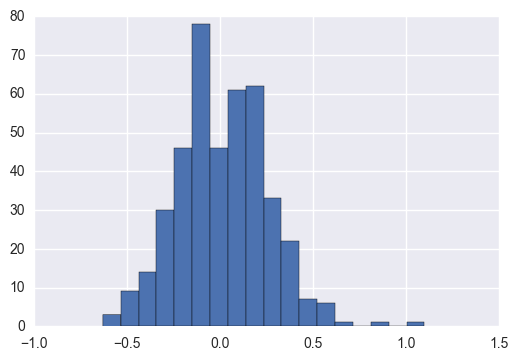

In [158]:
loss_ratio = ((ntrue-npred)/npred).flatten()
plt.hist(loss_ratio, bins=18)

In [159]:
norm.fit(loss_ratio, floc=0)

(0, 0.24196070191021427)

In [161]:
tvm

array([[ 4,  9,  6, 11,  7, 14, 11, 20, 12, 16, 21, 26, 35],
       [ 3,  9,  4, 12,  2, 15, 10, 12, 16, 22, 16, 25, 35],
       [ 3,  5,  7,  9, 13, 10, 11, 11, 14, 19, 18, 19, 35],
       [ 2,  6,  9,  4, 13,  8, 13, 19, 19, 22, 15, 23, 35],
       [ 3,  4,  4,  4, 13,  9,  7,  7,  9, 18, 14, 20,  0],
       [ 2, 11,  2,  8,  4,  4,  7, 10,  9, 15, 15, 15,  0],
       [ 6, 12,  9, 12, 11, 13, 17, 18, 17, 17, 28, 15, 35]])

In [170]:
op = []
k = 35

for i, j in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    tvm = test_vol_group_count.loc[i].loc[j].reshape(-1,12)[::2]
    tvm = np.concatenate([tvm, [[k],[k],[k],[k],[0],[0],[k]]], axis=1)
    op += list(neigh_morning.predict(tvm).T.reshape(1,-1)[0])

for i, j in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    tvm = test_vol_group_count.loc[i].loc[j].reshape(-1,12)[1::2]
    tvm = np.concatenate([tvm, [[k],[k],[k],[k],[0],[0],[k]]], axis=1)
    op += list(neigh_night.predict(tvm).T.reshape(1,-1)[0])

In [172]:
neigh_night.predict(tvm).T.reshape(1,-1)[0]

array([ 41.14029137,  38.47519659,  44.43560003,  42.49686589,
        42.3719416 ,  47.5361508 ,  42.49854424,  43.61769257,
        42.20959187,  43.06784056,  47.30826751,  42.17750316,
        47.49205767,  45.73972057,  41.70495633,  42.83915683,
        43.71734864,  50.89989232,  38.05203434,  49.55477261,
        44.90547874,  45.11429197,  44.31913565,  49.76869123,
        50.32289946,  43.28918102,  50.83815424,  50.41078191,
        46.02129156,  44.95874198,  46.97405607,  49.98623724,
        40.28560979,  47.22672775,  46.28090895,  45.66245013,
        44.10819713,  48.84554219,  45.6966959 ,  41.30416461,
        44.71970712,  51.58331289,  33.84630743,  31.56888329,
        35.71270269,  33.08300776,  31.01938818,  36.93024114,
        35.20012864,  37.10627744,  31.93705843,  36.65486401,
        32.29162171,  31.2061561 ,  33.20164633,  35.13873133,
        31.5569618 ,  26.64801564,  32.48952289,  32.85191085,
        30.0704082 ,  34.76199076,  32.05969898,  33.74

In [73]:
sample['volume'] = op

sample.to_csv('submission/submission_0503v.csv', index=False)

ValueError: Length of values does not match length of index

In [74]:
df_morning2.mean()

0       11.218182
1       13.727273
2       16.781818
3       20.518182
4       24.672727
5       27.545455
6       31.836364
7       38.300000
8       39.654545
9       42.500000
10      44.736364
11      48.781818
12      51.418182
13      53.363636
14      54.590909
15      54.300000
16      55.381818
17      55.445455
18      54.936364
19      53.145455
20      50.990909
21      51.772727
22      47.063636
23      46.272727
wkwn    28.636364
dtype: float64

In [75]:
df_night2.mean()

0       43.981818
1       43.618182
2       45.000000
3       46.218182
4       44.718182
5       44.545455
6       46.554545
7       43.954545
8       45.990909
9       46.609091
10      47.463636
11      46.281818
12      44.127273
13      44.745455
14      43.772727
15      45.154545
16      42.781818
17      41.772727
18      32.890909
19      32.800000
20      33.027273
21      31.354545
22      29.472727
23      27.881818
wkwn    24.545455
dtype: float64

In [70]:
training_weather = pd.read_csv('weather (table 7)_training_update.csv')

In [80]:
training_weather['datetime'] = \
    [datetime(int(i[:4]), int(i[5:7]), int(i[8:10]), j) for i, j in \
         zip(training_weather['date'], training_weather['hour'])]

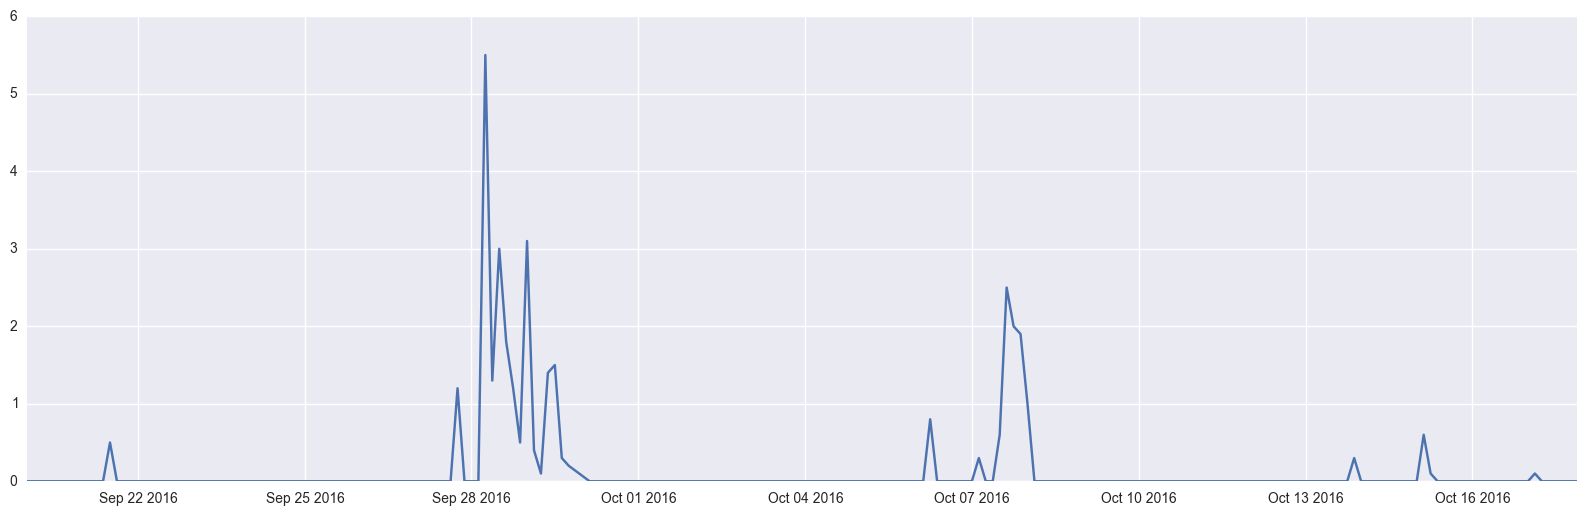

In [94]:
wt = training_weather.iloc[648:]

plt.figure(figsize=(20,6))
plt.plot(wt['datetime'], wt['precipitation'])

In [139]:
X1 = np.array([[1,2],[3,4],[5,3],[2,3]])

In [140]:
X2 = np.array([[1,7],[5,5],[4,3]])

In [141]:
m = np.array([1,2])
n = np.array([2,7])

In [151]:
((m-n)**2).sum()

26

In [145]:
fsf=None

# Self-written KNN

In [239]:
class KNeighborsRegressor_M():
    def __init__(self, n_neighbors=5, weights='uniform', 
                 distance_weights=None):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.distance_weights = distance_weights
        
    def fit(self, X, y):
        self._fit_X = X
        self._fit_y = y
    
    @staticmethod
    def distance_metric(m, n, dw):
        m = np.array(m)
        n = np.array(n)
        if dw != None:
            try:
                return np.sqrt(((m-n)**2*np.array(dw)).sum())
            except:
                raise ValueError('Check distance_weights')
        return np.sqrt(((m-n)**2).sum())
    
    def distance_matrix(self, X1, X2):
        dmatrix = \
            [[KNeighborsRegressor_M.distance_metric(
                        i, j, self.distance_weights) 
              for i in X1] for j in X2]
        dmatrix = np.array(dmatrix)
        return dmatrix
    
    def predict(self, X):
        _dmatrix = self.distance_matrix(self._fit_X, X)
        nn = min(self.n_neighbors, self._fit_X.shape[0])
        nn_dist_matrix = np.array([np.partition(i, 2)[:2] for i in _dmatrix])
        nn_arg_matrix = np.array([np.argpartition(i, 2)[:2] for i in _dmatrix])
        
        
        return None
    
    
    

In [244]:
dm = KNeighborsRegressor_M(distance_weights=None).distance_matrix(X1, X2)
dm

array([[ 5.        ,  3.60555128,  5.65685425,  4.12310563],
       [ 5.        ,  2.23606798,  2.        ,  3.60555128],
       [ 3.16227766,  1.41421356,  1.        ,  2.        ]])

In [235]:
np.array([np.partition(i, 2)[:2] for i in dm])

array([[ 3.60555128,  4.12310563],
       [ 2.        ,  2.23606798],
       [ 1.        ,  1.41421356]])

In [234]:
[np.argpartition(i, 2)[:2] for i in dm]

[array([1, 3]), array([2, 1]), array([2, 1])]

In [229]:
np.argpartition(test, 4)[:4]

array([9, 1, 6, 2])

In [230]:
np.partition(test, 4)[:4]

array([0, 1, 1, 3])

In [231]:
?np.partition